 # **importing modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

 # **reading dataset**

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 # **Data Pre-processing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#dropping irrelevant columns
df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis = 1,inplace = True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [11]:
df.shape

(891, 7)

 # **Visualizing the data**

<ipython-input-12-6f915be8adc7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived'] == 0])
<ipython-input-12-6f915be8adc7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived'] == 1])


<Axes: xlabel='Age', ylabel='Density'>

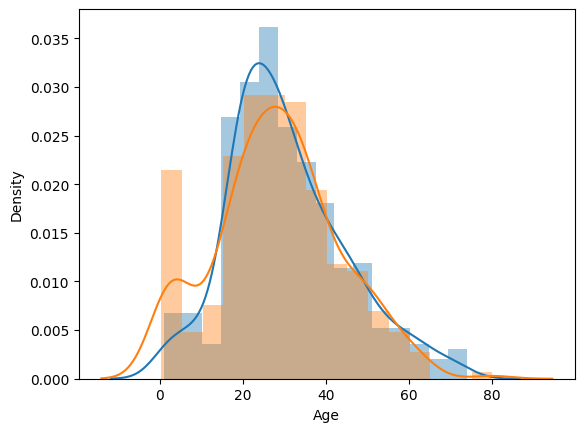

In [12]:
sns.distplot(df['Age'][df['Survived'] == 0])
sns.distplot(df['Age'][df['Survived'] == 1])

In [13]:
#percentage of survival according to gender
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [14]:
# percentage of survival by Pclass
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
# percentage of survival according to embarked
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [16]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
# filling the NaN value with S because this value has higher number of occurence
df['Embarked'].fillna('S',inplace=True)

In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [19]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()
num_null_age = df['Age'].isnull().sum()

In [20]:
age = np.random.randint(mean_age - std_age, mean_age + std_age, size = num_null_age)

In [21]:
age

array([22, 15, 37, 32, 42, 43, 25, 42, 36, 41, 22, 41, 42, 20, 20, 24, 16,
       38, 24, 15, 17, 29, 43, 36, 22, 29, 26, 26, 37, 31, 31, 35, 41, 39,
       21, 31, 41, 18, 22, 22, 17, 40, 40, 22, 38, 34, 31, 28, 41, 32, 18,
       24, 24, 23, 22, 34, 30, 19, 28, 41, 28, 27, 23, 17, 30, 41, 19, 24,
       27, 17, 35, 38, 43, 37, 32, 25, 42, 35, 15, 27, 27, 26, 34, 23, 36,
       24, 39, 34, 37, 38, 31, 29, 39, 24, 25, 34, 40, 34, 41, 16, 42, 22,
       21, 35, 15, 39, 23, 15, 37, 36, 25, 31, 43, 32, 33, 22, 33, 18, 22,
       27, 16, 41, 17, 26, 26, 21, 39, 21, 36, 16, 38, 24, 26, 36, 32, 43,
       21, 22, 34, 25, 43, 41, 31, 16, 38, 37, 36, 43, 15, 17, 17, 17, 22,
       32, 18, 41, 41, 19, 24, 37, 25, 26, 28, 29, 32, 41, 26, 31, 18, 26,
       16, 40, 21, 38, 29, 36, 41])

In [22]:
age.shape

(177,)

In [23]:
df['Age'][df['Age'].isnull()] = age

<ipython-input-23-46318ecb5c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = age


In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [25]:
df['family'] = df['SibSp'] + df['Parch'] + 1

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,1
887,1,1,female,19.0,0,0,S,1
888,0,3,female,41.0,1,2,S,4
889,1,1,male,26.0,0,0,C,1


In [27]:
df['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [28]:
def temp(n):
  if n == 1:
    return "Single"
  elif n > 1 and n < 5:
    return "Small"
  else:
    return "Large"

In [29]:
df['Family_type'] = df['family'].apply(temp)

In [30]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family,Family_type
853,1,1,female,16.0,0,1,S,2,Small
827,1,2,male,1.0,0,2,C,3,Small
856,1,1,female,45.0,1,1,S,3,Small
132,0,3,female,47.0,1,0,S,2,Small
37,0,3,male,21.0,0,0,S,1,Single
646,0,3,male,19.0,0,0,S,1,Single
542,0,3,female,11.0,4,2,S,7,Large
804,1,3,male,27.0,0,0,S,1,Single
229,0,3,female,38.0,3,1,S,5,Large
695,0,2,male,52.0,0,0,S,1,Single


In [31]:
df.drop(['SibSp','Parch','family'], axis = 1, inplace = True)

In [32]:
df

,Survived,Pclass,Sex,Age,Embarked,Family_type
0,0,3,male,22.0,S,Small
1,1,1,female,38.0,C,Small
2,1,3,female,26.0,S,Single
3,1,1,female,35.0,S,Small
4,0,3,male,35.0,S,Single
...,...,...,...,...,...,...
886,0,2,male,27.0,S,Single
887,1,1,female,19.0,S,Single
888,0,3,female,41.0,S,Small
889,1,1,male,26.0,C,Single


In [33]:
new_df = pd.get_dummies(df, columns = ['Pclass', 'Sex', 'Embarked', 'Family_type'], drop_first = True)

In [34]:
new_df

,Survived,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Single,Family_type_Small
0,0,22.0,False,True,True,False,True,False,True
1,1,38.0,False,False,False,False,False,False,True
2,1,26.0,False,True,False,False,True,True,False
3,1,35.0,False,False,False,False,True,False,True
4,0,35.0,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...
886,0,27.0,True,False,True,False,True,True,False
887,1,19.0,False,False,False,False,True,True,False
888,0,41.0,False,True,False,False,True,False,True
889,1,26.0,False,False,True,False,False,True,False


In [35]:
new_df.shape

(891, 9)

In [36]:
x = new_df.iloc[:,1:].values
y = new_df.iloc[:,0].values

In [37]:
from sklearn.model_selection import train_test_split

 # **Splitting the dataset into training and testing data**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

 # **Training the model**

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [40]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
lr_pred = LR.predict(x_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [45]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
c_pred = classifier.predict(x_test)

 # **Testing the model**

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
print("Logistic Regression Accuracy Score :",accuracy_score(y_test, lr_pred))
print("RandomForestClassifier Accuracy Score :", accuracy_score(y_test,c_pred))

Logistic Regression Accuracy Score : 0.8044692737430168
RandomForestClassifier Accuracy Score : 0.8044692737430168


In [52]:
print("Logistic Regression :")
print(confusion_matrix(y_test, lr_pred))

Logistic Regression :
[[91 14]
 [21 53]]


In [55]:
print("RandomForestClassifier :")
print(confusion_matrix(y_test, c_pred))

RandomForestClassifier :
[[90 15]
 [20 54]]


In [54]:
print("Logistic Regression :")
print(classification_report(y_test,lr_pred))

Logistic Regression :
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [56]:
print("RandomForestClassifier :")
print(classification_report(y_test, c_pred))

RandomForestClassifier :
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

